### Modeling nonlinear relationships

Dealing with non-linear relationship using polynominalfeatures, decision tree regression, random forest regression
```
simple model -> easier to understand
computationally efficient --> less processing time (less time to run the model)
good predictive power --> high accuracy, not prone to noise, works well on unseen data
scaling --> easier to scale to large dataset
```

In [1]:
%load_ext watermark
%watermark -a "Himansu Sahoo" -u -d -v -p numpy,pandas,matplotlib,scipy,sklearn,seaborn

Himansu Sahoo 
last updated: 2019-01-19 

CPython 3.6.6
IPython 6.1.0

numpy 1.15.3
pandas 0.23.4
matplotlib 2.2.2
scipy 1.1.0
sklearn 0.20.0
seaborn 0.9.0


In [2]:
import sys
sys.path.append("..")
from library import *

In [3]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import urllib.request
%matplotlib inline

In [4]:
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.linear_model import LinearRegression, RANSACRegressor
# from sklearn.linear_model import Lasso, Ridge, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

In [7]:
data_dir = "dataset"
#df = pd.read_csv("housing.data.txt", header=None, sep="\s+")
df = pd.read_csv("../"+os.sep+data_dir+os.sep+"housing.data.txt", header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(df.shape)
df.head(n=10)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [8]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [9]:
print(X.shape)
print(y.shape)

(506, 1)
(506,)


In [10]:
def lin_regplot(X, y, model=None):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

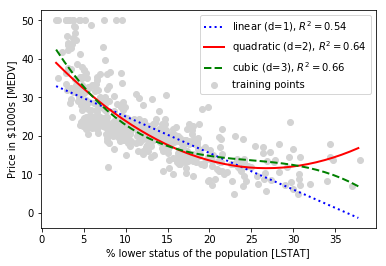

In [11]:
regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

#plt.savefig('images/10_11.png', dpi=300)
plt.show()

<b> why log transformation is used with right-skewed distribution </b>
https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution
<br>
```
after log transformation :
symmetric --> left-skew
right-skew --> symmetric
left-skew --> more left-skew

after power transformation/exponetiation : 
left-skew --> normal
```
log function de-emphasizes very larg values. right-skewed distributon have few large values.
log transformation brings these values into the center of the distribution making it look more like a normal distribution. <br>
https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55


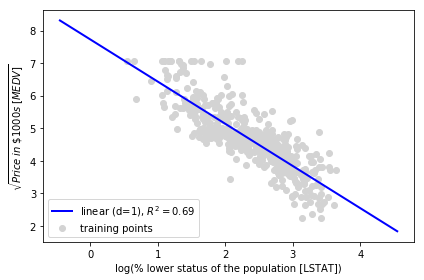

In [12]:
# transform features
X_log = np.log(X) # why took log transformation
y_sqrt = np.sqrt(y) # why took square root

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('images/10_12.png', dpi=300)
plt.show()

#### Decision Tree Regression

In [13]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
print(dir(tree))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_validate_X_predict', 'apply', 'class_weight', 'classes_', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_classes_', 'n_features_', 'n_outputs_', 'predict', 'presort', 'random_state', 'score', 'set_params', 'splitter', 'tree_']


In [15]:
print("tree.n_classes_ : ", tree.n_classes_)
print("tree.n_features_ : ", tree.n_features_)

tree.n_classes_ :  1
tree.n_features_ :  1


In [16]:
sort_idx = X.flatten().argsort()
#X[sort_idx]

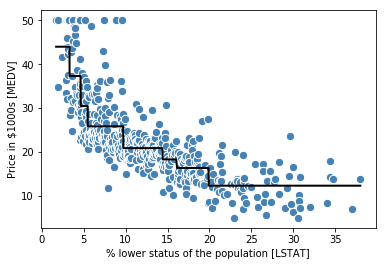

In [17]:
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
#plt.savefig('images/10_13.png', dpi=300)
plt.show()

#### Random forest Regression

In [18]:
X1 = df.iloc[:, :-1].values
y1 = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4, random_state=1)

In [19]:
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [20]:
print(dir(forest))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'base_estimator_', 'bootstrap', 'class_weight', 'criterion', 'decision_path', 'estimator_params', 'estimators_', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_we

In [21]:
print("forest.n_features_ : ", forest.n_features_)
print("forest.n_outputs_ : ", forest.n_outputs_)

forest.n_features_ :  13
forest.n_outputs_ :  1


In [22]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


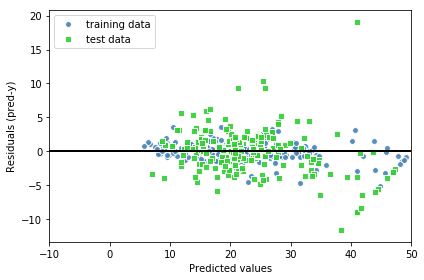

In [23]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9,
            label='training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals (pred-y)')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()